In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [2]:
data = pd.read_csv('test.csv',index_col=0)

In [3]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [6]:
data.drop(['Name','Ticket','Cabin'],axis = 1,inplace = True)

In [7]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

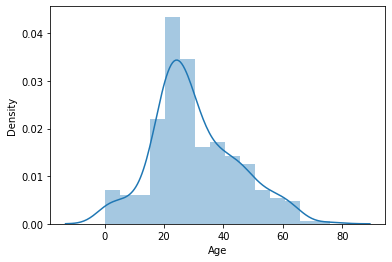

In [8]:
sns.distplot(data['Age'])

<AxesSubplot:>

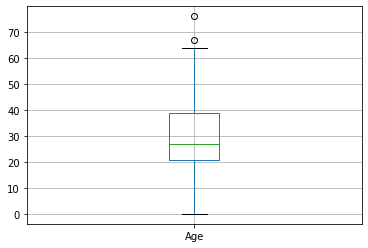

In [9]:
data.boxplot('Age')

In [10]:
data['Age'] = data['Age'].fillna(data['Age'].median())


# Creating new feature

In [11]:
data.loc[data['Age']<18,'New_Age_Cat']='young'
data.loc[(data['Age']>=18) & (data['Age']<50),'New_Age_Cat']='adult'
data.loc[(data['Age']>=50),'New_Age_Cat']='senior'

In [12]:
data.loc[(data['Age']<18) & (data['Sex']== 'male'),'cat_male']= 'young_male'
data.loc[((data['Age']>=18) & (data['Age']<50)) & (data['Sex']== 'male'),'cat_male']= 'adult_male'
data.loc[(data['Age']>=50) & (data['Sex']== 'male'),'cat_male']= 'senior_male'
# same thing for female
data.loc[(data['Age']<18) & (data['Sex']== 'female'),'cat_male']= 'young_female'
data.loc[((data['Age']>=18) & (data['Age']<50)) & (data['Sex']== 'female'),'cat_male']= 'adult_female'
data.loc[(data['Age']>=50) & (data['Sex']== 'female'),'cat_male']= 'senior_female'


In [13]:
# Is alone
data.loc[(data['SibSp'] + data['Parch'] > 0),'is_alone'] ='not_alone'
data.loc[(data['SibSp'] + data['Parch'] == 0),'is_alone'] ='alone'

In [14]:
data.loc[(data['Fare']<40),'new_fare']='low'
data.loc[(data['Fare']>=40) & (data['Fare']<80),'new_fare']='medium'
data.loc[(data['Fare']>=80),'new_fare']='high'

In [15]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_Age_Cat,cat_male,is_alone,new_fare
PassengerId,,,,,,,,,,,
892,3,male,34.5,0,0,7.8292,Q,adult,adult_male,alone,low
893,3,female,47.0,1,0,7.0000,S,adult,adult_female,not_alone,low
894,2,male,62.0,0,0,9.6875,Q,senior,senior_male,alone,low
895,3,male,27.0,0,0,8.6625,S,adult,adult_male,alone,low
896,3,female,22.0,1,1,12.2875,S,adult,adult_female,not_alone,low


# Converting categorical feature into new feature

In [16]:
Sex = pd.get_dummies(data['Sex'],drop_first=True)
Embarked = pd.get_dummies(data['Embarked'],drop_first=True)
New_Age_Cat = pd.get_dummies(data['New_Age_Cat'],drop_first=True)
cat_male = pd.get_dummies(data['cat_male'],drop_first=True)
is_alone = pd.get_dummies(data['is_alone'],drop_first=True)
new_fare = pd.get_dummies(data['new_fare'],drop_first=True)




In [17]:
data = pd.concat([data,Sex,Embarked,New_Age_Cat,cat_male,is_alone,new_fare],axis =1)


In [18]:
data.drop(['Sex','Age','Fare','Embarked','New_Age_Cat','cat_male','is_alone','new_fare'],axis =1 ,inplace = True)

In [19]:
data.head()

,Pclass,SibSp,Parch,male,Q,S,senior,young,adult_male,senior_female,senior_male,young_female,young_male,not_alone,low,medium
PassengerId,,,,,,,,,,,,,,,,
892,3,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0
893,3,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0
894,2,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0
895,3,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
896,3,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0


In [21]:
data.to_csv('final_test.csv',index= False)